In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
def plot_tot_tob(gt_tot, gt_tob, pred_tot, pred_tob):
    fig, axes = plt.subplots(2, 2, figsize=(15, 5))
    sns.histplot(gt_tot, kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('GT TOT')
    sns.histplot(gt_tob, kde=True, ax=axes[0, 1])
    axes[0, 1].set_title('GT TOB')
    sns.histplot(pred_tot, kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('Pred TOT')
    sns.histplot(pred_tob, kde=True, ax=axes[1, 1])
    axes[1, 1].set_title('Pred TOB')
    plt.tight_layout()
    plt.show()

In [4]:
# pred_res_path = '../logs/eval/runs/debug/2023-11-16_18-25-41/pred_res.csv'
# pred_res_path = '../logs/eval/runs/quantile_data_dropout_0.5/2023-11-21_10-58-21/pred_res.csv'
pred_res_path = '../logs/eval/runs/equal_width_cls/2023-11-23_14-03-34/pred_res.csv'
pred_res = pd.read_csv(pred_res_path)
gt_tot = pred_res.gt_tot
gt_tob = pred_res.gt_tob
pred_tot = pred_res.pred_tot
pred_tob = pred_res.pred_tob

### 定量分析

#### 预测值的相对误差

In [9]:
abs_tot = np.sum(np.abs(pred_tot - gt_tot) / gt_tot) / len(gt_tot)
abs_tob = np.sum(np.abs(pred_tob - gt_tob) / gt_tob) / len(gt_tob)
abs_tot, abs_tob

(1.5172714157227507, 0.9752219748254574)

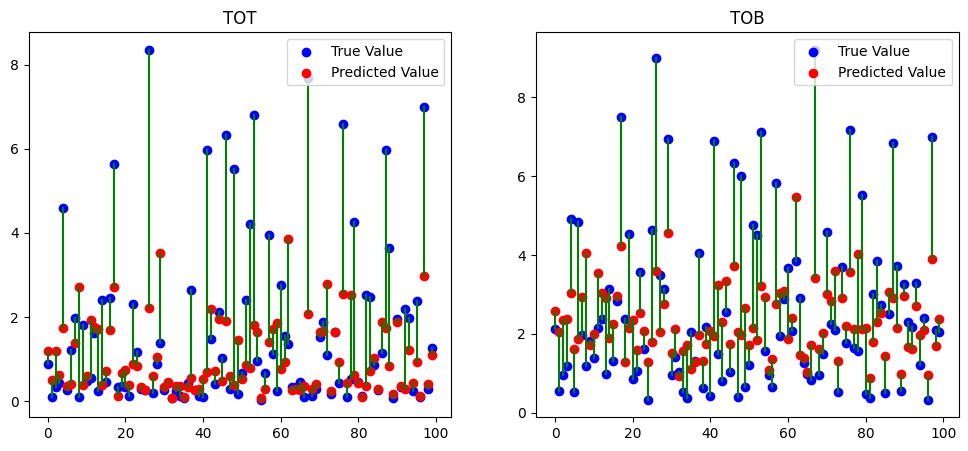

In [22]:
sample_num = 100
sample_gt_tot = gt_tot[:sample_num]
sample_pred_tot = pred_tot[:sample_num] 
sample_gt_tob = gt_tob[:sample_num]
sample_pred_tob = pred_tob[:sample_num] 
x = np.arange(len(sample_gt_tot))
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].scatter(x, sample_gt_tot, color='blue', label='True Value')
ax[0].scatter(x, sample_pred_tot, color='red', label='Predicted Value')
for i in range(len(sample_gt_tot)):
    ax[0].plot([x[i]]*2, [sample_gt_tot[i], sample_pred_tot[i]], color='green')
ax[0].set_title('TOT')
ax[0].legend()
ax[1].scatter(x, sample_gt_tob, color='blue', label='True Value')
ax[1].scatter(x, sample_pred_tob, color='red', label='Predicted Value')
for i in range(len(sample_gt_tob)):
    if sample_gt_tob[i] <= sample_pred_tob[i]:
        color = 'green'
    else:
        color = 'black'
    ax[1].plot([x[i]]*2, [sample_gt_tob[i], sample_pred_tob[i]], color='green')
ax[1].legend()
ax[1].set_title('TOB')

# 显示图形
plt.show()


#### 分类问题指标统计-定量分析

In [7]:
print(classification_report(gt_tot, pred_tot)), print(confusion_matrix(gt_tot, pred_tot))

              precision    recall  f1-score   support

           0       0.64      0.94      0.77      1983
           1       0.30      0.13      0.18       508
           2       0.20      0.01      0.02       284
           3       0.25      0.00      0.01       210
           4       0.35      0.23      0.28       474

    accuracy                           0.59      3459
   macro avg       0.35      0.26      0.25      3459
weighted avg       0.49      0.59      0.51      3459

[[1869   52    4    1   57]
 [ 382   66    0    0   60]
 [ 187   47    3    1   46]
 [ 143   18    4    1   44]
 [ 322   36    4    1  111]]


(None, None)

In [9]:
print(classification_report(gt_tob, pred_tob)), print(confusion_matrix(gt_tob, pred_tob))

              precision    recall  f1-score   support

           0       0.63      0.96      0.76      1983
           1       0.30      0.15      0.20       508
           2       0.12      0.01      0.02       284
           3       0.37      0.03      0.06       210
           4       0.00      0.00      0.00       143
           5       0.34      0.16      0.22       331

    accuracy                           0.59      3459
   macro avg       0.29      0.22      0.21      3459
weighted avg       0.47      0.59      0.49      3459

[[1896   54    5    5    0   23]
 [ 406   75    6    1    1   19]
 [ 202   52    3    2    0   25]
 [ 156   21    5    7    0   21]
 [ 112   13    0    2    0   16]
 [ 238   32    6    2    0   53]]


(None, None)

### 定性分析
#### 预测分布绘制

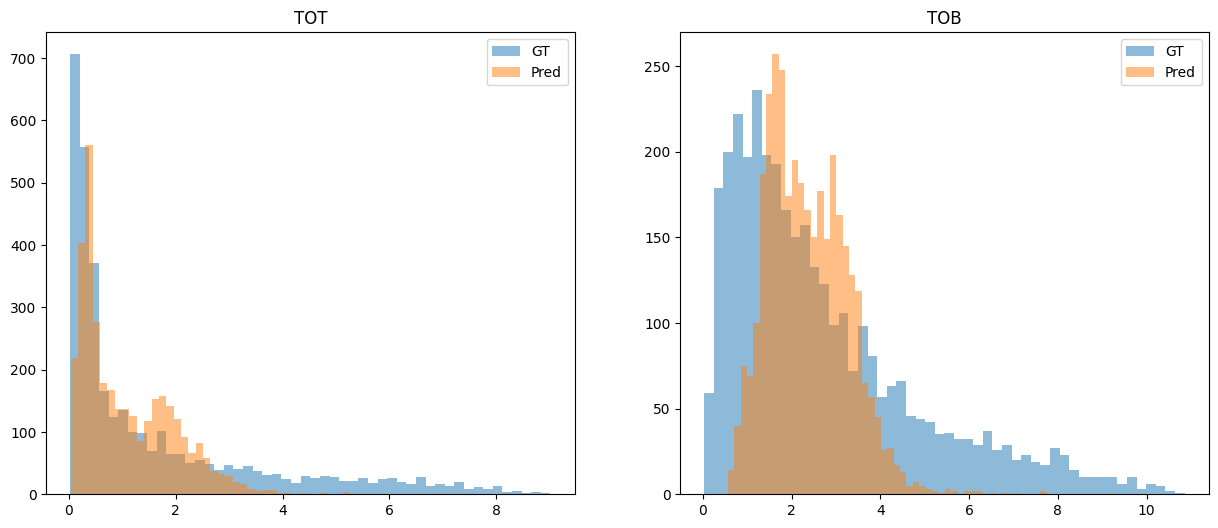

In [14]:
# 创建一个子图
fig, ax = plt.subplots(1,2, figsize=(15, 6))
# 绘制第一组数据的直方图，设置透明度为0.5
ax[0].hist(gt_tot, bins=50, alpha=0.5, label='GT')
# 绘制第二组数据的直方图，设置透明度为0.5
ax[0].hist(pred_tot, bins=50, alpha=0.5, label='Pred')
ax[0].set_title('TOT')
# 添加图例
ax[0].legend(loc='upper right')

ax[1].hist(gt_tob, bins=50, alpha=0.5, label='GT')
# 绘制第二组数据的直方图，设置透明度为0.5
ax[1].hist(pred_tob, bins=50, alpha=0.5, label='Pred')
ax[1].set_title('TOB')
# 添加图例
ax[1].legend(loc='upper right')

# 显示图像
plt.show()

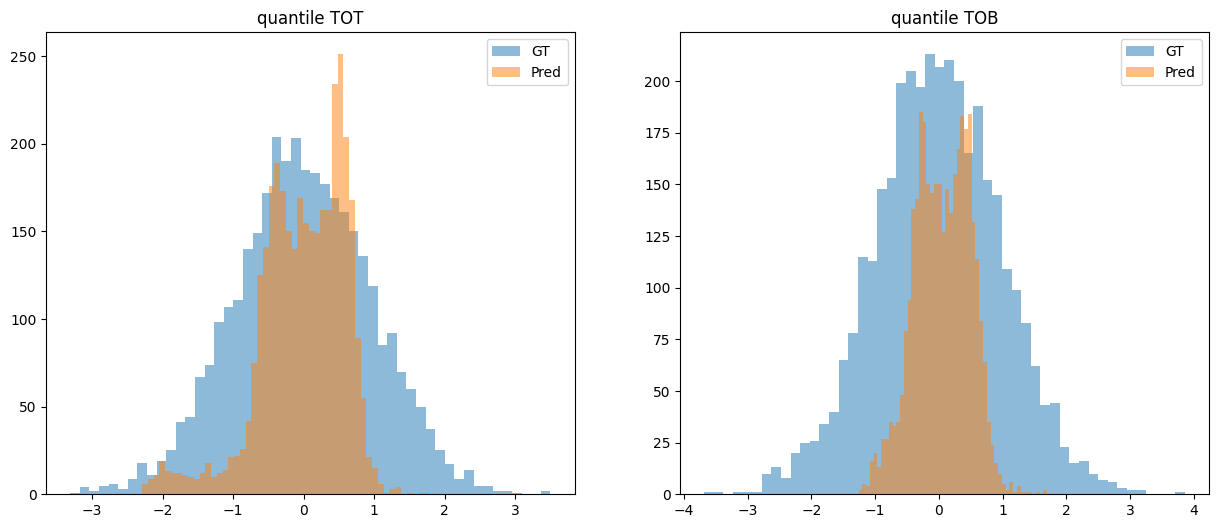

In [18]:
# 创建一个子图
fig, ax = plt.subplots(1,2, figsize=(15, 6))
# 绘制第一组数据的直方图，设置透明度为0.5
gt_tot_quantile = pred_res.gt_tot_quantile
gt_tob_quantile = pred_res.gt_tob_quantile
pred_tot_quantile = pred_res.pred_tot_quantile
pred_tob_quantile = pred_res.pred_tob_quantile
ax[0].hist(gt_tot_quantile, bins=50, alpha=0.5, label='GT')
# 绘制第二组数据的直方图，设置透明度为0.5
ax[0].hist(pred_tot_quantile, bins=50, alpha=0.5, label='Pred')
ax[0].set_title('quantile TOT')
# 添加图例
ax[0].legend(loc='upper right')

ax[1].hist(gt_tob_quantile, bins=50, alpha=0.5, label='GT')
# 绘制第二组数据的直方图，设置透明度为0.5
ax[1].hist(pred_tob_quantile, bins=50, alpha=0.5, label='Pred')
ax[1].set_title('quantile TOB')
# 添加图例
ax[1].legend(loc='upper right')

# 显示图像
plt.show()

In [1]:
import pandas as pd

# 假设data是我们的数据，column_name是我们要分箱的列
data = pd.DataFrame({
    'column_name': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
})

# 定义分箱的数量
num_bins = 4

# 使用pandas的qcut函数进行分位数分箱
data['quantile_bins'] = pd.qcut(data['column_name'], q=num_bins)

# 打印分箱结果
print(data)


   column_name  quantile_bins
0            1  (0.999, 3.25]
1            2  (0.999, 3.25]
2            3  (0.999, 3.25]
3            4    (3.25, 5.5]
4            5    (3.25, 5.5]
5            6    (5.5, 7.75]
6            7    (5.5, 7.75]
7            8   (7.75, 10.0]
8            9   (7.75, 10.0]
9           10   (7.75, 10.0]
